<a href="https://colab.research.google.com/github/maing-rv/spotify_song_popularity_prediction/blob/main/python_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google doc - report + references:
https://docs.google.com/document/d/1sOuEaIPvdHxhAXZPNPEwqhgPJhfEIN3VK7it6kPEZmk/edit

Problem: **Predicting song popularity.** 

# Loading and viewing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# How to load files: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#from google.colab import files
#uploaded = files.upload()

In [3]:
# Data w/ genres:
#spotify_data_w_genres = pd.read_csv('data_w_genres.csv')
#spotify_data_w_genres.head()

In [4]:
# Data by year:
spotify_data_by_year = pd.read_csv('data_by_year.csv')
spotify_data_by_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


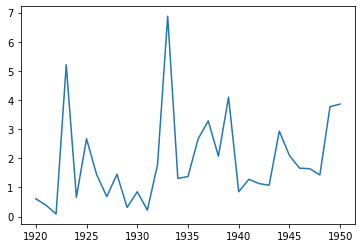

In [5]:
# Popularity by year, 1920 to 1950:
plt.plot(spotify_data_by_year.year[:31], spotify_data_by_year.popularity[:31])
plt.show()

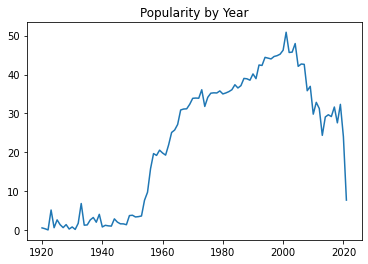

In [6]:
# Popularity by year, 1920 to 2020:
plt.plot(spotify_data_by_year.year, spotify_data_by_year.popularity)
plt.title("Popularity by Year")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


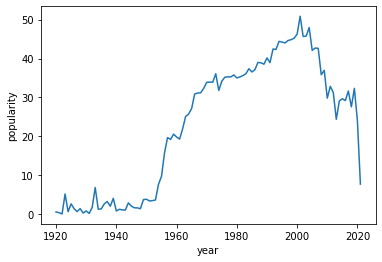

In [7]:
sns.lineplot(spotify_data_by_year.year, spotify_data_by_year.popularity)#.set_title('Popularity by Year')

# Data.csv

In [8]:
data = pd.read_csv('data.csv')
#data.shape

In [9]:
# Data with popularity:
spotify_data = pd.read_csv('data.csv')
spotify_data.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
5,0.996000,['Mamie Smith & Her Jazz Hounds'],0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920
6,0.992000,['Mamie Smith'],0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920
7,0.996000,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.996000,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.006820,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920


In [10]:
# Statistical description of the data:
spotify_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [11]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

**Column descriptions:**  
Acousticness - The relative metric of the track being acoustic.  
Danceability - The relative measurement of the track being danceable.  
Duration_ms - The length of the track in milliseconds (ms).  
Energy - The energy of the track.   
Explicit - The binary value whether the track contains explicit content or not.  
Instrumentalness - The relative ratio of the track being instrumental.    
Key - 0-11 - The primary key of the track encoded as integers in between 0 and 11.  
Liveness - The relative duration of the track sounding as a live performance.  
Loudness - Relative loudness of the track in the typical range [-60, 0] in decibel (dB).  
Mode - The binary value representing whether the track starts with a major (1) chord progression or not (0).    
Speechiness - The relative length of the track containing any kind of human voice.  
Tempo - The tempo of the track in Beat Per Minute (BPM).   
Valence -  The positiveness of the track.   
Year - The release year of track.

Popularity - The popularity of the song lately, default country = US.

**Columns to drop:**    
1) artists - The list of artists credited for production of the track.   
2) id - The primary identifier for the track, generated by Spotify.    
3) release_date - The date of release of the track in yyyy-mm-dd, yyyy-mm, or even yyyy format.    
4) name - The title of the track.    




In [12]:
#spotify_data_20_50 = spotify_data[spotify_data.year <= 1950]
#spotify_data_20_50.shape

In [13]:
#spotify_data_50_90 = spotify_data[(spotify_data.year > 1950) & (spotify_data.year <= 1990)]
#spotify_data_50_90.shape

In [14]:
#spotify_data_90_20 = spotify_data[spotify_data.year > 1990]
#spotify_data_90_20.shape

### Preproccessing Dataset


In [15]:
# Check for null values:
spotify_data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [16]:
# Check for duplicates - based on all columns:
spotify_data.duplicated().sum()

2159

In [17]:
# Drop duplicates:
spotify_data = spotify_data.drop_duplicates(keep='first')
spotify_data.duplicated().sum()

0

In [18]:
# Check for duplicates - based on name + artists - may have different id:
#spotify_data[spotify_data.duplicated(subset=['name','artists'])]
spotify_data.duplicated(subset=['name','artists']).sum()

12789

In [19]:
# Drop duplicates:
spotify_data = spotify_data.drop_duplicates(subset=['name','artists'],keep='first')
spotify_data.duplicated(subset=['name','artists']).sum()

0

In [20]:
spotify_data.shape

(159441, 19)

## Popularity distribution

Text(0.5, 1.0, 'Original popularity distribution')

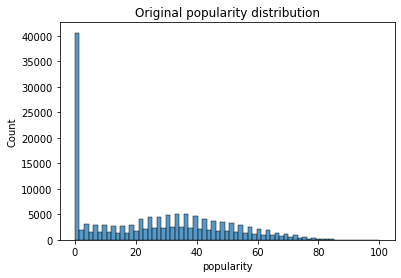

In [21]:
# Popularity distribution:
sns.histplot(spotify_data['popularity']).set_title('Original popularity distribution')

In [22]:
# Tracks w/ popularity score of 0:
spotify_data[spotify_data.popularity == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7,0.99600,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.99600,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.00682,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920
10,0.95200,['Dorville'],0.688,150067,0.2200,0,07jrRR1CUUoPb1FLfSy9Jh,0.000,6,0.2620,-15.208,0,Oouin,0,1920,0.8450,82.024,0.4140,1920
11,0.99600,['Francisco Canaro'],0.579,167213,0.3560,0,0ANuF7SvPeIHanGcCpy9jR,0.948,10,0.1740,-14.574,1,Desengaño - Remasterizado,0,1920-07-08,0.0394,131.494,0.7030,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174365,0.97600,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.358,381150,0.1210,0,0sZ6HFSulsrOl6VTBwp6jd,0.889,2,0.1350,-25.111,1,I giorni,0,2021-01-23,0.0532,131.808,0.1060,2021
174369,0.99500,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.297,349200,0.0287,0,2LeqqwzobL5ktfQhWA3bHh,0.908,8,0.0995,-30.008,1,Nuvole bianche,0,2021-01-23,0.0564,141.636,0.0678,2021
174371,0.99500,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.343,206700,0.0165,0,3Glmyv3hbGGTgeR3FZrxJA,0.878,9,0.0774,-30.915,0,Una Mattina,0,2021-01-23,0.0455,126.970,0.1510,2021
174375,0.98800,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.316,303333,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.879,3,0.1200,-24.121,1,Night,0,2021-01-23,0.0515,81.070,0.0373,2021


In [23]:
# Drop tracks w/ popularity == 0:
spotify_data.drop(spotify_data[spotify_data.popularity == 0].index, inplace=True)
# spotify_data[spotify_data.popularity == 0]

Text(0.5, 1.0, 'Popularity distribution after pre-processing')

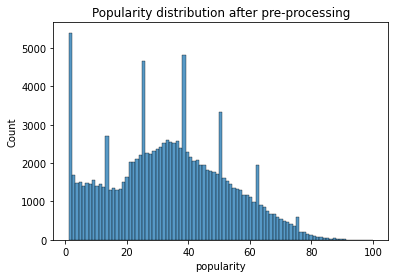

In [24]:
# After:
sns.histplot(spotify_data['popularity']).set_title('Popularity distribution after pre-processing')

In [25]:
spotify_data['popularity'].describe()

count    122250.000000
mean         33.831403
std          19.028542
min           1.000000
25%          20.000000
50%          34.000000
75%          47.000000
max         100.000000
Name: popularity, dtype: float64

In [26]:
# Drop 4 irrrelevant columns:
spotify_data = spotify_data.drop(['id', 'artists', 'name', 'release_date'], axis=1)

In [27]:
print(spotify_data.shape)

(122250, 15)


# Correlation heat-map

In [28]:
corr = spotify_data.corr()
corr

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.238069,-0.079858,-0.753267,-0.210127,0.207847,-0.034679,-0.052447,-0.579688,0.068600,-0.367472,-0.046900,-0.200038,-0.215731,-0.528767
danceability,-0.238069,1.000000,-0.091475,0.200451,0.201286,-0.242301,0.031413,-0.119080,0.267582,-0.050164,0.183517,0.191634,-0.042720,0.548977,0.164362
duration_ms,-0.079858,-0.091475,1.000000,0.026346,0.002301,0.069956,-0.001957,0.052638,-0.013009,-0.058872,0.044866,-0.033537,-0.018535,-0.158562,0.049962
energy,-0.753267,0.200451,0.026346,1.000000,0.166569,-0.182203,0.034610,0.164130,0.777414,-0.056975,0.276201,0.033054,0.244296,0.368443,0.451447
explicit,-0.210127,0.201286,0.002301,0.166569,1.000000,-0.104500,0.012374,0.022039,0.199116,-0.073767,0.269334,0.257726,0.008142,-0.025626,0.288072
instrumentalness,0.207847,-0.242301,0.069956,-0.182203,-0.104500,1.000000,-0.020192,-0.030455,-0.363643,-0.049083,-0.232715,-0.099313,-0.064441,-0.219202,-0.095337
key,-0.034679,0.031413,-0.001957,0.034610,0.012374,-0.020192,1.000000,-0.006021,0.018935,-0.121237,0.005010,0.052258,0.006962,0.027376,0.013118
liveness,-0.052447,-0.119080,0.052638,0.164130,0.022039,-0.030455,-0.006021,1.000000,0.076375,0.003958,-0.097402,0.156276,0.019100,-0.015947,0.013025
loudness,-0.579688,0.267582,-0.013009,0.777414,0.199116,-0.363643,0.018935,0.076375,1.000000,-0.015744,0.323520,-0.048430,0.197554,0.314129,0.416047
mode,0.068600,-0.050164,-0.058872,-0.056975,-0.073767,-0.049083,-0.121237,0.003958,-0.015744,1.000000,-0.025702,-0.067533,0.005360,0.019646,-0.052527


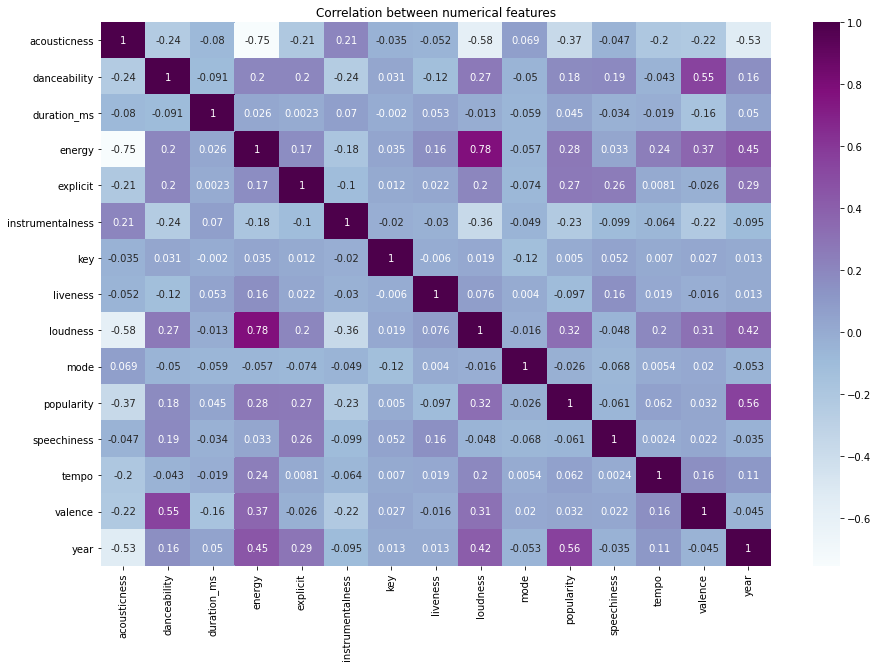

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation between numerical features')
plt.show()

In [30]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print(series)

popularity          1.000000
year                0.558056
acousticness        0.367472
loudness            0.323520
energy              0.276201
explicit            0.269334
instrumentalness    0.232715
danceability        0.183517
liveness            0.097402
tempo               0.061529
speechiness         0.060751
duration_ms         0.044866
valence             0.032047
mode                0.025702
key                 0.005010
Name: popularity, dtype: float64


# Data exploration


This section will be exploring the overall trends found in the dataset, to see how the variables correlate with each other.
There 10 continuous variables and 3 categorial ones - explicit, key, mode.

In [31]:
# Pair-plot for features:
#sns.pairplot(spotify_data)

## Acousticness

In [32]:
#plt.hist(spotify_data.acousticness)
#plt.xlabel('acousticness')
#plt.ylabel('count')
#plt.title('Acousticness Distribution')
#plt.show()

In [33]:
#sns.histplot(spotify_data.acousticness).set_title('Acousticness Distribution')

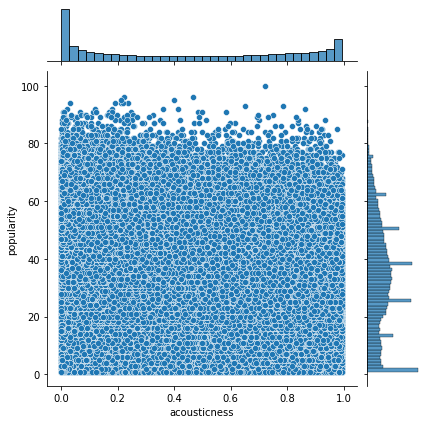

In [34]:
# Acousticness:
acousticness_vs_popularity = sns.jointplot(x = 'acousticness', y = 'popularity', data = spotify_data)
#acousticness_vs_popularity.savefig('acousticness_vs_popularity.png')

In [35]:
#sns.violinplot(x = 'key', y = 'popularity', data = spotify_data)

## Instrumentalness - split into a binary feature

Text(0.5, 1.0, 'Instrumentalness Distribution')

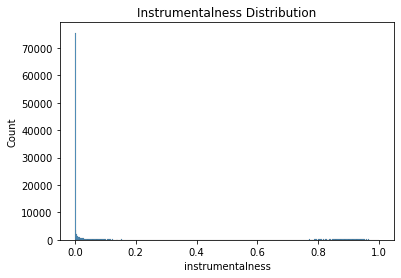

In [36]:
sns.histplot(spotify_data.instrumentalness).set_title('Instrumentalness Distribution')

In [37]:
#data[data['instrumentalness']==0]

In [38]:
#spotify_data['instrumentalness'] = spotify_data['instrumentalness'].replace(0, spotify_data['instrumentalness'].mean())

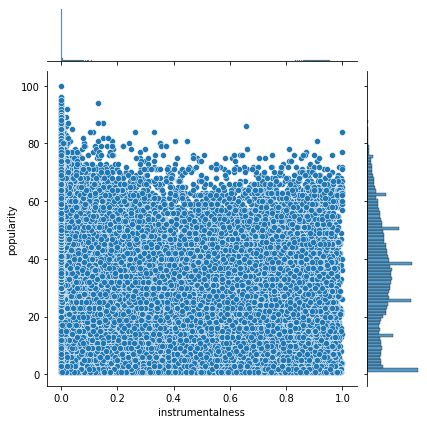

In [39]:
# Instrumentalness:
instrumentalness_vs_popularity = sns.jointplot(x = 'instrumentalness', y = 'popularity', data = spotify_data)
#instrumentalness_vs_popularity.savefig('instrumentalness_vs_popularity.png')

In [40]:
#plt.hist(spotify_data.instrumentalness)
#plt.xlabel('instrumentalness')
#plt.ylabel('count')
#plt.title('Instrumentalness Distribution')
#plt.show()

In [41]:
# Split into binary feature:
spotify_data['instrumentalness'] = list(map((lambda x: 0 if x <= 0.5 else 1), spotify_data.instrumentalness))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


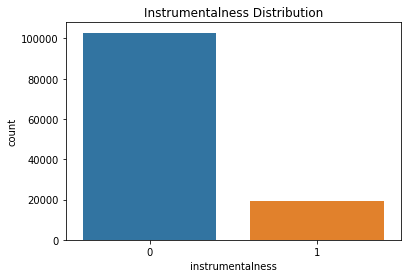

In [42]:
instrumentalness_distr = sns.countplot(spotify_data.instrumentalness).set_title('Instrumentalness Distribution')
#instrumentalness_distr = instrumentalness_distr.get_figure()
#instrumentalness_distr.savefig('instrumentalness_distr.png')

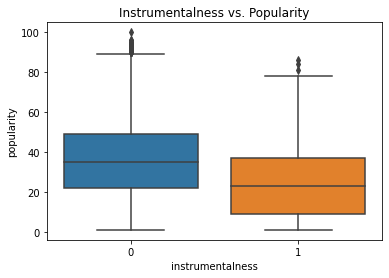

In [43]:
#sns.boxplot(x = 'instrumentalness', y = 'popularity', data = spotify_data)
binary_instrumentalness_vs_popularity = sns.boxplot(x = 'instrumentalness', y = 'popularity', data = spotify_data).set_title('Instrumentalness vs. Popularity')
#binary_instrumentalness_vs_popularity = binary_instrumentalness_vs_popularity.get_figure()
#binary_instrumentalness_vs_popularity.savefig('binary_instrumentalness_vs_popularity.png')

## Energy

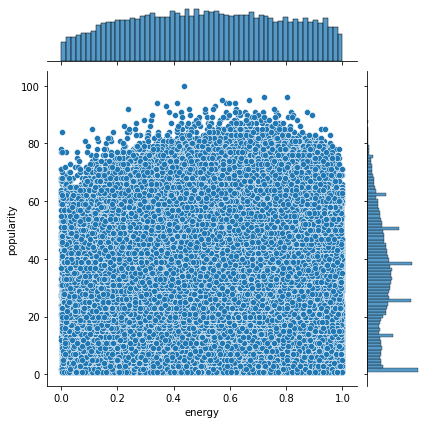

In [44]:
# Energy:
energy_vs_popularity = sns.jointplot(x = 'energy', y = 'popularity', data = spotify_data)
#energy_vs_popularity.savefig('energy_vs_popularity.png')

In [45]:
#plt.hist(spotify_data.energy)
#plt.xlabel('energy')
#plt.ylabel('count')
#plt.title('Energy Distribution')
#plt.show()

In [46]:
#sns.histplot(spotify_data.energy).set_title('Energy Distribution')

## Loudness - skewed left, negative values, a few marginal outliers

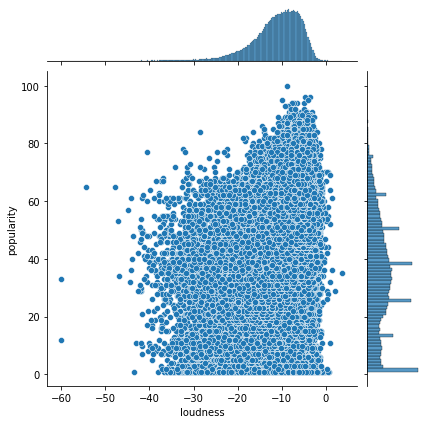

In [47]:
# Loudness:
loudness_vs_popularity = sns.jointplot(x = 'loudness', y = 'popularity', data = spotify_data)
#loudness_vs_popularity.savefig('loudness_vs_popularity.png')

In [48]:
#plt.hist(spotify_data.loudness)
#plt.xlabel('loudness')
#plt.ylabel('count')
#plt.title('Loudness Distribution')
#plt.show()

In [49]:
#sns.histplot(spotify_data.loudness).set_title('Loudness Distribution')

In [50]:
#spotify_data['loudness_log'] = np.log1p(spotify_data['loudness'])
#sns.distplot(spotify_data.loudness_log)

## Duration - skewed right (log transformed), a few marginal outliers

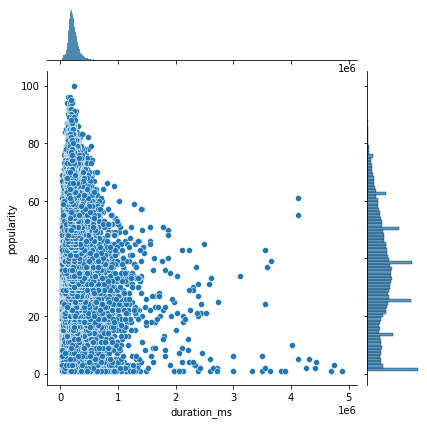

In [51]:
# Duration:
duration_ms_vs_popularity = sns.jointplot(x = 'duration_ms', y = 'popularity', data = spotify_data)
#duration_ms_vs_popularity.savefig('duration_ms_vs_popularity.png')

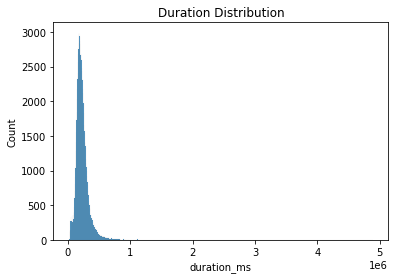

In [52]:
duration_ms_distr = sns.histplot(spotify_data['duration_ms']).set_title('Duration Distribution')
#duration_ms_distr = duration_ms_distr.get_figure()
#duration_ms_distr.savefig('duration_ms_distr.png')

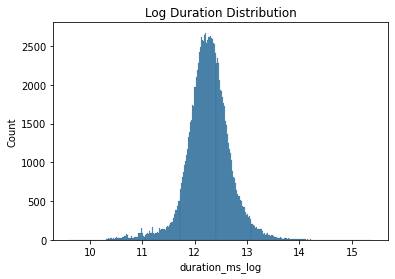

In [53]:
# Log transform:
spotify_data['duration_ms_log'] = np.log1p(spotify_data['duration_ms'])

duration_ms_log_distr = sns.histplot(spotify_data['duration_ms_log']).set_title('Log Duration Distribution')
#duration_ms_log_distr = duration_ms_log_distr.get_figure()
#duration_ms_log_distr.savefig('duration_ms_log_distr.png')

In [54]:
print(spotify_data['duration_ms'].skew(), spotify_data['duration_ms_log'].skew())

8.780584850601539 -0.12005902202713316


## Liveness - skewed right

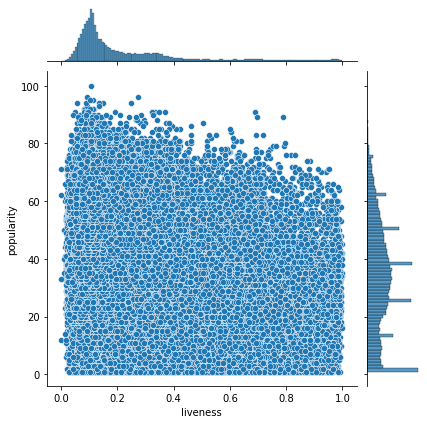

In [55]:
# Liveness:
liveness_vs_popularity = sns.jointplot(x = 'liveness', y = 'popularity', data = spotify_data)
#liveness_vs_popularity.savefig('liveness_vs_popularity.png')

In [56]:
#plt.hist(spotify_data.liveness)
#plt.xlabel('liveness')
#plt.ylabel('count')
#plt.title('Liveness Distribution')
#plt.show()

Text(0.5, 1.0, 'Liveness Distribution')

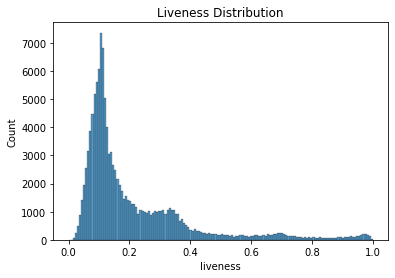

In [57]:
sns.histplot(spotify_data.liveness).set_title('Liveness Distribution')

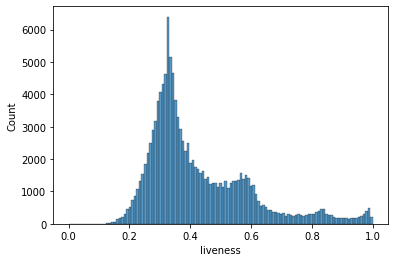

In [58]:
sqrt_liveness=np.sqrt(spotify_data.liveness)
sns.histplot(sqrt_liveness)

In [59]:
#spotify_data['liveness_log'] = np.log1p(spotify_data['liveness'])
#sns.distplot(spotify_data.liveness_log)

##Speechiness - missing values (or outliers) at 0 + tracks above 0.66 dropped (audiobooks/podcasts) + log transformed 

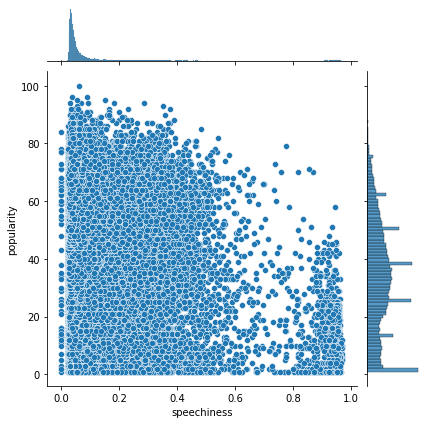

In [60]:
# Speechiness:
speechiness_vs_popularity = sns.jointplot(x = 'speechiness', y = 'popularity', data = spotify_data)
#speechiness_vs_popularity.savefig('speechiness_vs_popularity.png')

In [61]:
#plt.hist(spotify_data.speechiness)
#plt.xlabel('speechiness')
#plt.ylabel('count')
#plt.title('Speechiness Distribution')
#plt.show()

In [62]:
# Outliers at 0: 
#spotify_data[spotify_data.speechiness == 0]
spotify_data['speechiness'] = spotify_data['speechiness'].replace(0, spotify_data['speechiness'].mean())

In [63]:
#spotify_data['speechiness'] = list(map((lambda x: 0 if x < 0.66 else 1), spotify_data.speechiness))
#spotify_data[spotify_data.speechiness == 1]

In [64]:
spotify_data[spotify_data.speechiness > 0.66]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_ms_log
1187,0.581,0.717,125167,0.254,0,0,4,0.394,-23.432,0,6,0.909,116.411,0.242,1926,11.737412
1206,0.456,0.719,137157,0.190,0,0,8,0.307,-22.712,0,1,0.915,114.452,0.295,1926,11.828889
1213,0.363,0.663,121327,0.162,0,0,11,0.277,-22.452,1,1,0.940,82.335,0.312,1926,11.706253
1214,0.411,0.738,135616,0.163,0,0,9,0.340,-21.276,1,1,0.864,115.452,0.317,1926,11.817590
1216,0.618,0.645,141310,0.205,0,0,0,0.238,-20.228,1,1,0.948,86.693,0.297,1926,11.858718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171940,0.756,0.508,140587,0.882,1,0,4,0.875,-9.271,1,45,0.936,133.485,0.108,2009,11.853589
172552,0.795,0.365,135240,0.625,0,1,4,0.757,-18.546,1,7,0.828,144.094,0.575,2012,11.814814
173010,0.822,0.951,174655,0.203,0,0,1,0.111,-11.464,1,1,0.924,130.027,0.163,2014,12.070574
173127,0.278,0.442,161080,0.446,1,0,9,0.308,-11.354,0,58,0.786,51.539,0.295,2015,11.989663


In [65]:
# Drop tracks w/ speechiness > 0.66 - audiobooks and podcasts:
spotify_data.drop(spotify_data[spotify_data.speechiness > 0.66].index, inplace=True)

#sns.histplot(spotify_data['speechiness']).set_title('Speechiness Distribution')

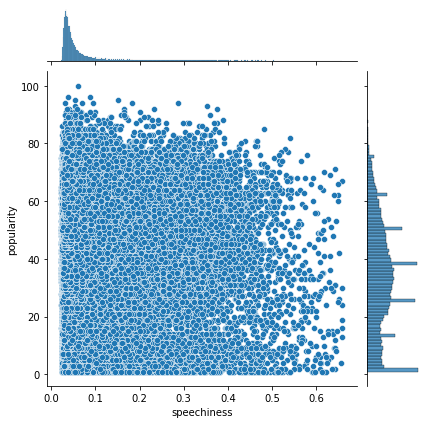

In [66]:
trans_speechiness_vs_popularity = sns.jointplot(x = 'speechiness', y = 'popularity', data = spotify_data)
#trans_speechiness_vs_popularity.savefig('trans_speechiness_vs_popularity.png')

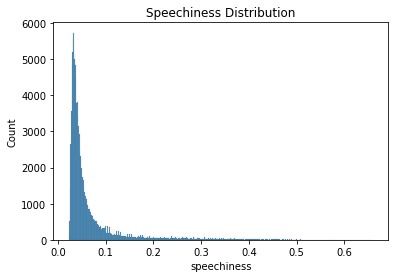

In [67]:
speechiness_distr = sns.histplot(spotify_data['speechiness']).set_title('Speechiness Distribution')
#speechiness_distr = speechiness_distr.get_figure()
#speechiness_distr.savefig('speechiness_distr.png')

In [68]:
#from scipy import stats
#boxcox_speechiness=stats.boxcox(spotify_data.speechiness)[0]
#sns.histplot(boxcox_speechiness)

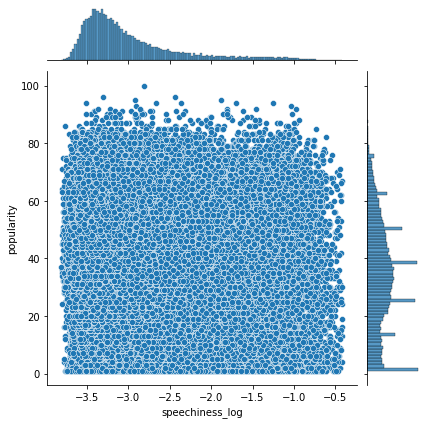

In [69]:
# Log transform:
spotify_data['speechiness_log'] = np.log(spotify_data['speechiness'])

trans_speechiness_vs_popularity = sns.jointplot(x = 'speechiness_log', y = 'popularity', data = spotify_data)
#trans_speechiness_vs_popularity.savefig('trans_speechiness_vs_popularity.png')

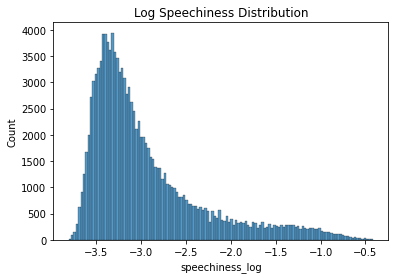

In [70]:
speechiness_log_distr = sns.histplot(spotify_data['speechiness_log']).set_title('Log Speechiness Distribution')
#speechiness_log_distr = speechiness_log_distr.get_figure()
#speechiness_log_distr.savefig('speechiness_log_distr.png')

## Tempo - missing values (or outliers) at 0 replaced w/ mean

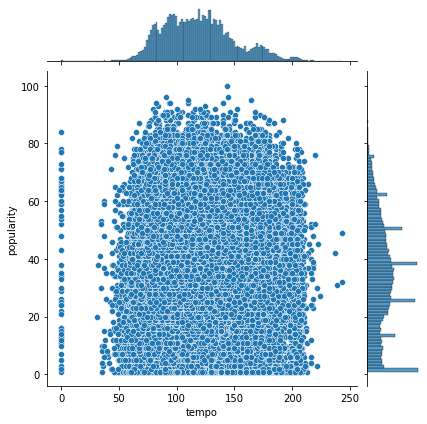

In [71]:
# Tempo:
tempo_vs_popularity = sns.jointplot(x = 'tempo', y = 'popularity', data = spotify_data)
#tempo_vs_popularity.savefig('tempo_vs_popularity.png')

In [72]:
#spotify_data.drop(spotify_data[spotify_data.tempo == 0].index, inplace=True)
#df['column name'] = df['column name'].replace(['old value'],'new value')
spotify_data['tempo'] = spotify_data['tempo'].replace(0, spotify_data['tempo'].mean())
spotify_data[spotify_data['tempo'] == 0]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_ms_log,speechiness_log


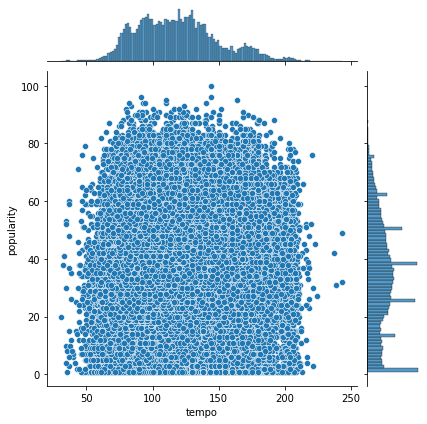

In [73]:
# Tempo:
trans_tempo_vs_popularity = sns.jointplot(x = 'tempo', y = 'popularity', data = spotify_data)
#trans_tempo_vs_popularity.savefig('trans_tempo_vs_popularity.png')

In [74]:
#sns.histplot(spotify_data['tempo']).set_title('Tempo Distribution')

## Valence - missing values (or outliers) at 0 replaced with mean

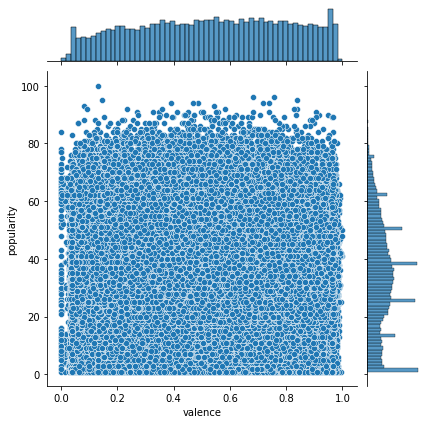

In [75]:
# Valence
valence_vs_popularity = sns.jointplot(x = 'valence', y = 'popularity', data = spotify_data)
#valence_vs_popularity.savefig('valence_vs_popularity.png')

In [76]:
spotify_data['valence'] = spotify_data['valence'].replace(0, spotify_data['valence'].mean())
spotify_data[spotify_data['valence'] == 0]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_ms_log,speechiness_log


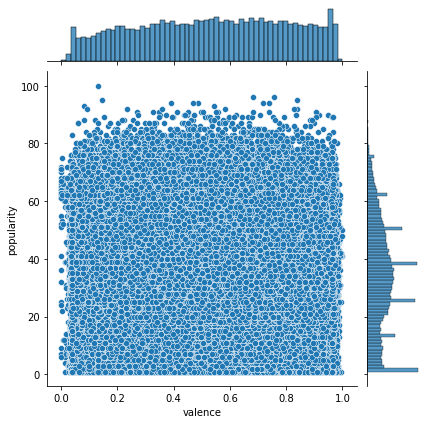

In [77]:
# Valence
trans_valence_vs_popularity = sns.jointplot(x = 'valence', y = 'popularity', data = spotify_data)
#trans_valence_vs_popularity.savefig('trans_valence_vs_popularity.png')

In [78]:
#sns.histplot(spotify_data['valence']).set_title('Valence Distribution')

## Danceability - outliers at 0 replaced with mean


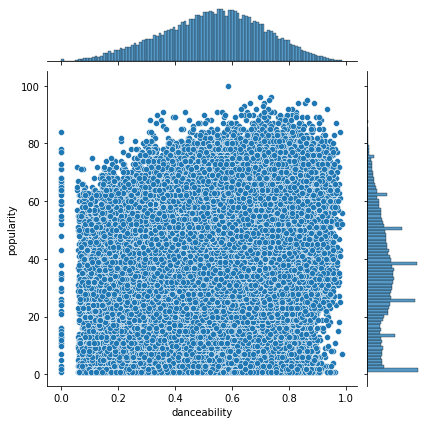

In [79]:
# Danceability:
danceability_vs_popularity = sns.jointplot(x = 'danceability', y = 'popularity', data = spotify_data)
#danceability_vs_popularity.savefig('danceability_vs_popularity.png')

In [80]:
#spotify_data.drop(spotify_data[spotify_data.danceability == 0].index, inplace=True)
spotify_data['danceability'] = spotify_data['danceability'].replace(0, spotify_data['danceability'].mean())
spotify_data[spotify_data['danceability'] == 0]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_ms_log,speechiness_log


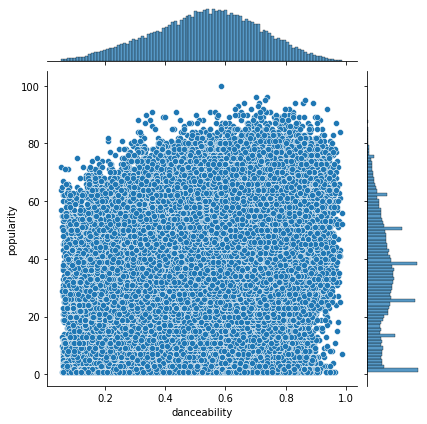

In [81]:
# Danceability:
trans_danceability_vs_popularity = sns.jointplot(x = 'danceability', y = 'popularity', data = spotify_data)
#trans_danceability_vs_popularity.savefig('trans_danceability_vs_popularity.png')

In [82]:
#sns.histplot(spotify_data['danceability']).set_title('Danceability Distribution')

## Year

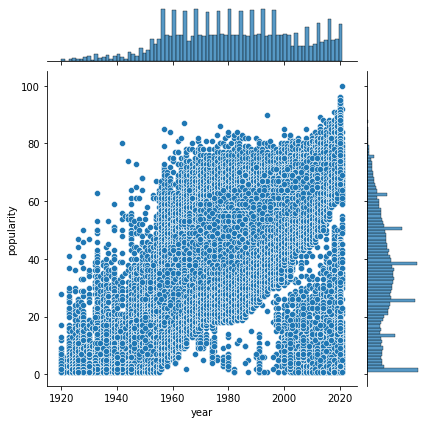

In [83]:
# Year
year_vs_popularity = sns.jointplot(x = 'year', y = 'popularity', data = spotify_data)
#year_vs_popularity.savefig('year_vs_popularity.png')

Text(0.5, 1.0, 'Year Distribution')

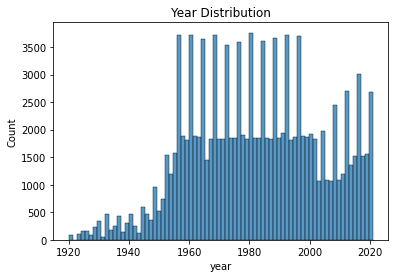

In [84]:
sns.histplot(spotify_data['year']).set_title('Year Distribution')

## Key

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


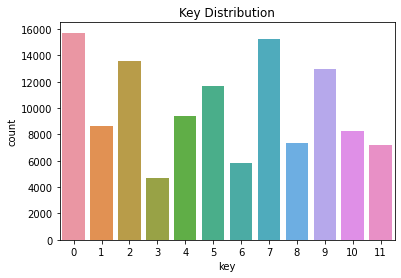

In [85]:
# Key:
#sns.distplot(spotify_data['key']).set_title('Key Distribution')
#plt.hist(spotify_data['key'])
#plt.title('Key Distribution')
#plt.show()

key_distr = sns.countplot(spotify_data.key).set_title('Key Distribution')
#key_distr = key_distr.get_figure()
#key_distr.savefig('key_distr.png')

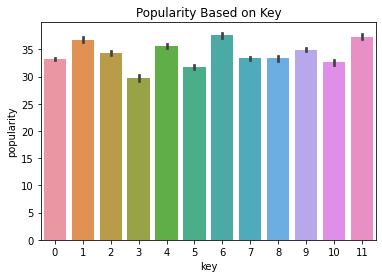

In [86]:
key_vs_popularity = sns.barplot(x = 'key', y = 'popularity', data = spotify_data).set_title('Popularity Based on Key')
#key_vs_popularity = key_vs_popularity.get_figure()
#key_vs_popularity.savefig('key_vs_popularity.png')

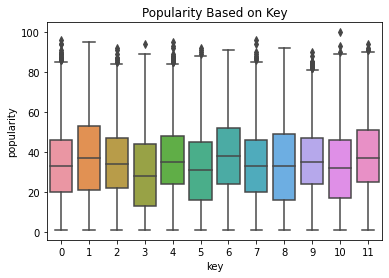

In [87]:
key_vs_popularity = sns.boxplot(x = 'key', y = 'popularity', data = spotify_data).set_title('Popularity Based on Key')
#key_vs_popularity = key_vs_popularity.get_figure()
#key_vs_popularity.savefig('key_vs_popularity.png')

## Mode

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


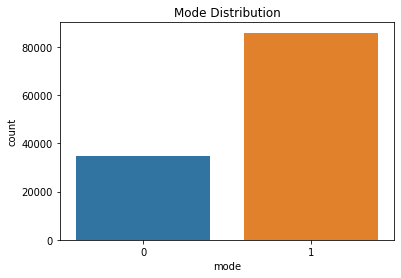

In [88]:
# Mode:
mode_distr = sns.countplot(spotify_data['mode']).set_title('Mode Distribution')
#mode_distr = mode_distr.get_figure()
#mode_distr.savefig('mode_distr.png')

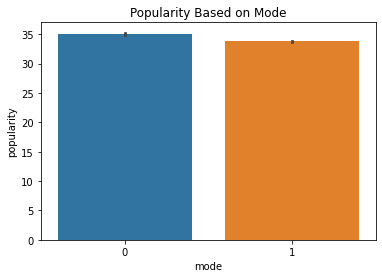

In [89]:
#Mode:
mode_vs_popularity = sns.barplot(x = 'mode', y = 'popularity', data = spotify_data).set_title('Popularity Based on Mode')
#mode_vs_popularity = mode_vs_popularity.get_figure()
#mode_vs_popularity.savefig('mode_vs_popularity.png')

## Explicit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


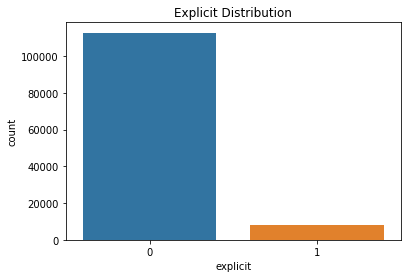

In [90]:
# Explicit:
explicit_distr = sns.countplot(spotify_data.explicit).set_title('Explicit Distribution')
#explicit_distr = explicit_distr.get_figure()
#explicit_distr.savefig('explicit_distr.png')

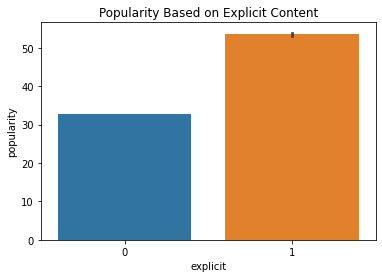

In [91]:
# Explicit:
explicit_vs_popularity = sns.barplot(x = 'explicit', y = 'popularity', data = spotify_data).set_title('Popularity Based on Explicit Content')
#explicit_vs_popularity = explicit_vs_popularity.get_figure()
#explicit_vs_popularity.savefig('explicit_vs_popularity.png')

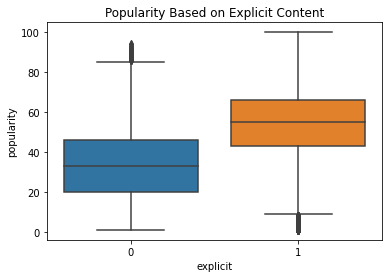

In [92]:
explicit_vs_popularity = sns.boxplot(x = 'explicit', y = 'popularity', data = spotify_data).set_title('Popularity Based on Explicit Content')
#explicit_vs_popularity = explicit_vs_popularity.get_figure()
#explicit_vs_popularity.savefig('explicit_vs_popularity.png')

# Log transformation - heat-map

In [93]:
corr = spotify_data.corr()
#corr

Text(0.5, 1.0, 'Correlation between numerical features')

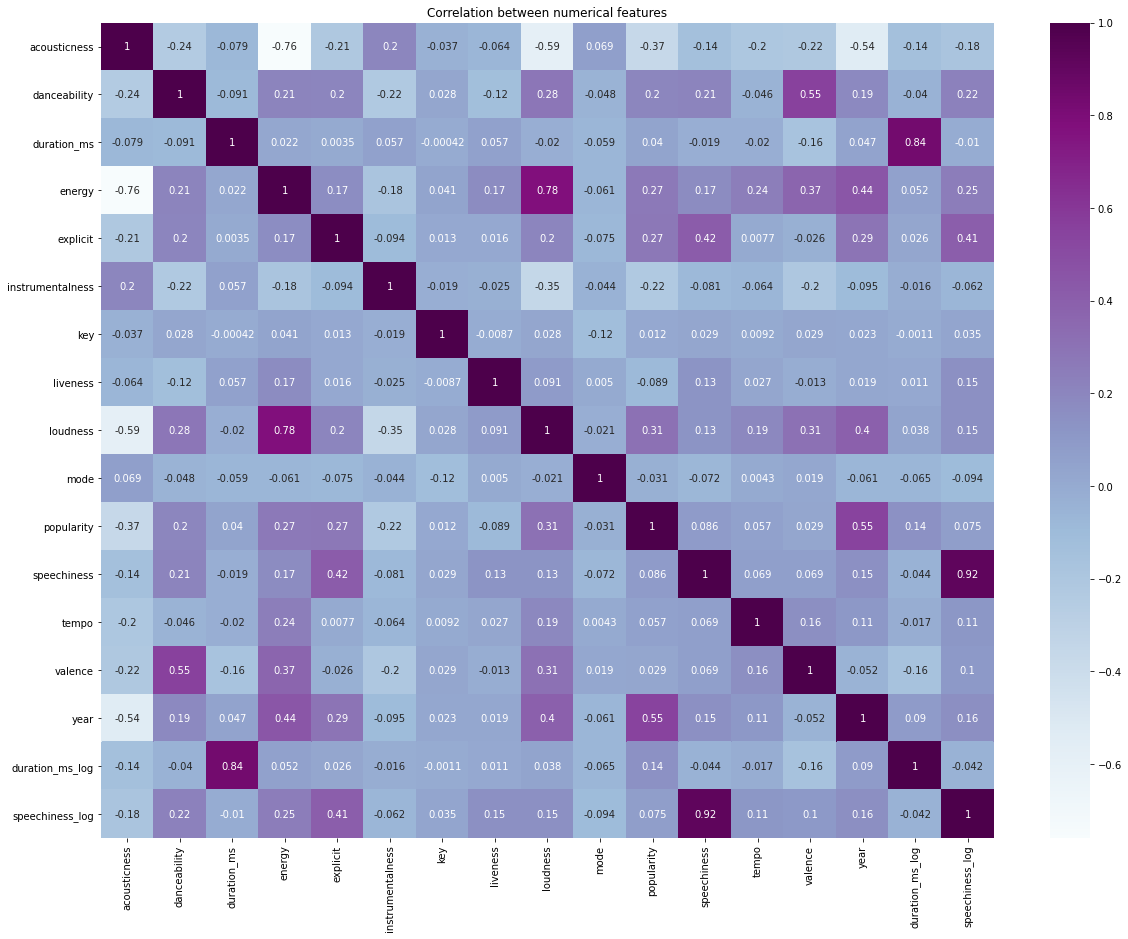

In [94]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation between numerical features')

In [95]:
# Threshold at 0.80 - drop columns:
spotify_data = spotify_data.drop(['duration_ms', 'speechiness'], axis=1)

In [96]:
spotify_data.describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,tempo,valence,year,duration_ms_log,speechiness_log
count,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000
mean,0.444707,0.534994,0.519182,0.066082,0.160687,5.182322,0.207594,-11.035315,0.711749,34.136963,118.626408,0.532226,1982.266583,12.269164,-2.945772
std,0.361169,0.173601,0.266428,0.248426,0.367244,3.507835,0.182672,5.336359,0.452950,18.920870,29.917659,0.264839,21.567089,0.417653,0.635435
min,0.000000,0.055100,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,1.000000,30.946000,0.000010,1920.000000,9.596215,-3.807663
25%,0.068200,0.417000,0.303000,0.000000,0.000000,2.000000,0.096200,-13.828000,0.000000,21.000000,95.534250,0.317000,1965.000000,12.044970,-3.384340
50%,0.410000,0.544000,0.521000,0.000000,0.000000,5.000000,0.133000,-10.208000,1.000000,34.000000,116.742500,0.541000,1982.000000,12.268240,-3.153556
75%,0.806000,0.660000,0.739000,0.000000,0.000000,8.000000,0.263000,-7.119000,1.000000,48.000000,136.836000,0.755000,1998.000000,12.500137,-2.725705
max,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,243.507000,1.000000,2021.000000,15.403268,-0.415515


In [97]:
spotify_data.shape

(120638, 15)

In [98]:
corr = spotify_data.corr()
print('Correlation scores: ')
np.abs(corr['popularity']).sort_values(ascending=False)

Correlation scores: 


popularity          1.000000
year                0.548948
acousticness        0.367549
loudness            0.307534
explicit            0.273300
energy              0.265893
instrumentalness    0.221811
danceability        0.200648
duration_ms_log     0.141955
liveness            0.088831
speechiness_log     0.074932
tempo               0.057125
mode                0.030649
valence             0.028868
key                 0.012190
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Correlation between numerical features')

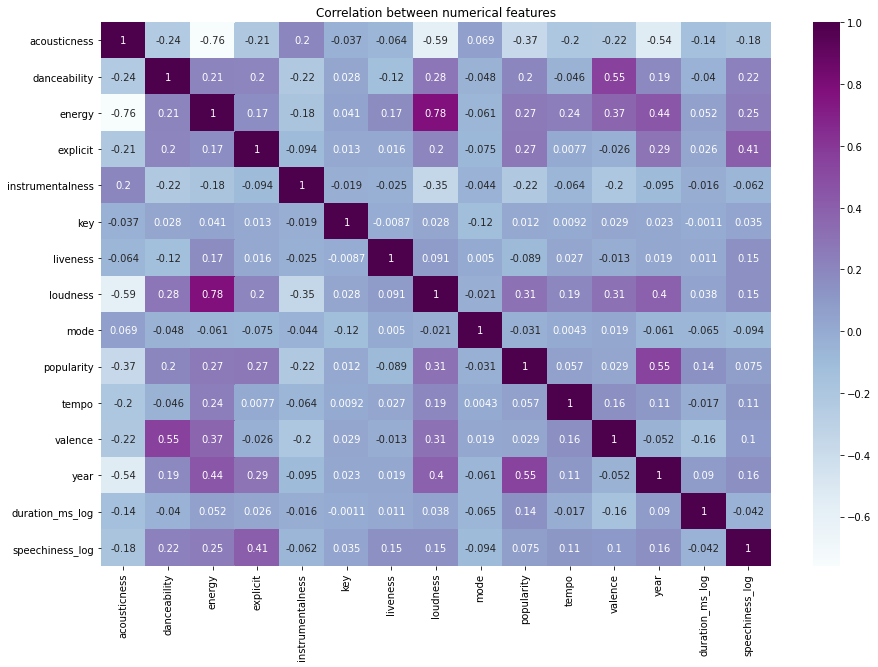

In [99]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation between numerical features')

# Feature extraction


## For Regression:

In [100]:
# Create features' and target variable:
X_regr = spotify_data.drop(['popularity'],axis=1)
#print(X_regr)
y_regr = spotify_data.popularity
#print(y_regr)

In [101]:
# Split the data - train and test sets:
from sklearn.model_selection import train_test_split
X_regr_train, X_regr_test, y_regr_train, y_regr_test = train_test_split(X_regr, y_regr, test_size = 0.2, random_state=0)

## For Classification:

In [102]:
# Popularity threshold for classification:
spotify_data.loc[spotify_data['popularity'] < 50, 'popularity'] = 0 
spotify_data.loc[spotify_data['popularity'] >= 50, 'popularity'] = 1
#spotify_data.loc[spotify_data['popularity'] == 1]

In [103]:
# Create features' and target variable:
X = spotify_data.drop(['popularity'],axis=1)
#print(X)
y = spotify_data.popularity
#print(y)

In [104]:
# Split the data - train and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Normalisation

We need to unskew the data, e.g. log transformation, and then normalise it, e.g. MinMaxScaler - before running the feature selection algorithm.   

https://scikit-learn.org/stable/modules/preprocessing.html

In [105]:
from sklearn.preprocessing import MinMaxScaler

cols = ['loudness', 'tempo', 'year', 'duration_ms_log', 'speechiness_log']

# For classification variables:
scaler = MinMaxScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [106]:
# For regression variables:
scaler = MinMaxScaler()
X_regr_train[cols] = scaler.fit_transform(X_regr_train[cols])
X_regr_test[cols] = scaler.transform(X_regr_test[cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

# Feature selection


## K Best Algorithm - feature scoring

In [107]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression

In [108]:
# Create the object for SelectKBest and fit and transform the classification data:
# k is the number of features you want to select [here we are scoring 'all']:
kbest = SelectKBest(score_func = chi2, k = 'all')
ordered_features = kbest.fit(X_train,y_train)

In [109]:
# Score df:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])

In [110]:
# Feature name df:
df_columns = pd.DataFrame(X_train.columns, columns = ['Feature_name'])

In [111]:
# Concatenate two dfs:
feature_rank = pd.concat([df_scores,df_columns],axis=1)

In [112]:
# Show in descending order:
feature_rank.nlargest(14,'Score')

,Score,Feature_name
3,6216.911178,explicit
4,1633.000599,instrumentalness
0,1609.012423,acousticness
11,1472.067163,year
2,480.644492,energy
1,152.316905,danceability
13,121.719812,speechiness_log
7,66.041584,loudness
6,60.665400,liveness
8,32.915800,mode


In [113]:
# Create the object for SelectKBest and fit and transform the regression data:
kbest = SelectKBest(score_func=f_regression, k='all').fit(X_regr_train, y_regr_train)
ordered_features = kbest.fit(X_regr_train, y_regr_train)

In [114]:
# Score df:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])

In [115]:
# Feature name df:
df_columns = pd.DataFrame(X_train.columns, columns = ['Feature_name'])

In [116]:
# Concatenate two dfs:
feature_rank = pd.concat([df_scores,df_columns],axis=1)

In [117]:
# Show in descending order:
feature_rank.nlargest(14,'Score')

,Score,Feature_name
11,41800.906206,year
0,15191.761111,acousticness
7,10196.774594,loudness
3,7872.233348,explicit
2,7395.706262,energy
4,5022.943639,instrumentalness
1,4086.417875,danceability
12,1947.940200,duration_ms_log
6,756.053376,liveness
13,523.660224,speechiness_log


## Extra Trees Classifier - feature importance

In [118]:
# Feature importance with decision trees:
from sklearn.ensemble import ExtraTreesClassifier

In [119]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [120]:
model.feature_importances_

array([0.08207079, 0.06830357, 0.07213497, 0.045851  , 0.01685485,
       0.05177922, 0.06544744, 0.08964421, 0.01356759, 0.06331902,
       0.06677783, 0.23125905, 0.07004755, 0.0629429 ])

In [121]:
ranked_features = pd.Series(model.feature_importances_, index = X_train.columns)

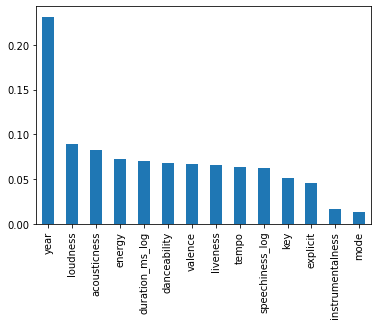

In [122]:
ranked_features.nlargest(14).plot(kind='bar')

## Mutual Info Classifier - information gain

In [123]:
from sklearn.feature_selection import mutual_info_classif
mu_ifo = mutual_info_classif(X_train,y_train)

In [124]:
mu_data = pd.Series(mu_ifo, index = X_train.columns)
print('Features scored based on information gain:')
mu_data.sort_values(ascending=False)

Features scored based on information gain:


year                0.132507
loudness            0.057791
acousticness        0.032920
duration_ms_log     0.028562
explicit            0.027601
energy              0.026622
tempo               0.025701
danceability        0.014180
instrumentalness    0.012072
mode                0.009128
speechiness_log     0.007193
key                 0.004837
valence             0.003200
liveness            0.002717
dtype: float64

# Modelling


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC 
from xgboost import XGBClassifier

#from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
# Combined function incl. model evaluation:
def classify(model, X, y):
    """ This function takes the model, the input variables and the target variable as parameters. It splits the data, normalises the data, fits the model, scores and cross-validates it."""
    # Split the data:
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
    # Normalise the data:
    scaler = MinMaxScaler()
    cols = ['loudness', 'year', 'duration_ms_log', 'speechiness_log' , 'tempo']
    X_train[cols] = scaler.fit_transform(X_train[cols])
    X_test[cols] = scaler.transform(X_test[cols])
    # Fit and score the model:
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)*100
    print('Accuracy is: ', score)
    # Cross-validation:
    cv_score = cross_val_score(model,X,y,cv=5)
    average_cv_score = np.mean(cv_score)*100
    print('Cross validation Accuracy: ', average_cv_score)

# Modelling - Regression:

In [128]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
X_regr_subset = spotify_data.drop(['popularity'],axis=1)
classify(mlr, X_regr_subset, y_regr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  25.22163943942668
Cross validation Accuracy:  17.035131073960212


# Modelling - Classification


## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
classify(clf, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  82.29442970822282


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation Accuracy:  79.74438200942427


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## SVM

In [133]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C = 1)
classify(clf, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  79.4512599469496
Cross validation Accuracy:  82.56445319220936


## KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
classify(knn, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  81.67274535809018
Cross validation Accuracy:  80.35865245953688


## Random Forests

In [131]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classify(rfc, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  85.62665782493369
Cross validation Accuracy:  84.73374041145448


## XGBoost

In [130]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
classify(xgb, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Accuracy is:  83.8071949602122
Cross validation Accuracy:  83.3104964003479


# Confusion Matrix


Important to have balanced dataset - popular and not popular.

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C = 1)

In [ ]:
clf.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

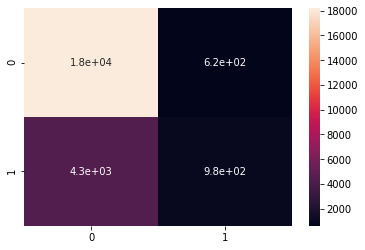

In [ ]:
print('Confusion matrix for Random Forests model:')
sns.heatmap(cm,annot=True)

In [ ]:
spotify_data.value_counts('popularity')

popularity
0    93880
1    26758
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


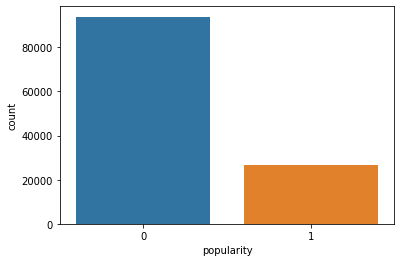

In [ ]:
sns.countplot(spotify_data.popularity)

In [ ]:
#data.drop(data[data.popularity == 0].index, inplace=True)
#data[data['year'] < 1930]

## Precision, recall, F1, ROC curve
